## Use some function for regularization of dataset based on problem 14.

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('ex2data2.txt', header = None, names = ['Test1', 'Test2', 'Result'])
data

,Test1,Test2,Result
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [3]:
data.insert(0, "Ones", 1)
data

,Ones,Test1,Test2,Result
0,1,0.051267,0.699560,1
1,1,-0.092742,0.684940,1
2,1,-0.213710,0.692250,1
3,1,-0.375000,0.502190,1
4,1,-0.513250,0.465640,1
...,...,...,...,...
113,1,-0.720620,0.538740,0
114,1,-0.593890,0.494880,0
115,1,-0.484450,0.999270,0
116,1,-0.006336,0.999270,0


In [4]:
cols = data.shape[1]

In [5]:
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

theta = np.array([0, 0, 0])
postive = data[data["Result"].isin([1])]
negative = data[data["Result"].isin([0])]

Text(0, 0.5, 'Test2')

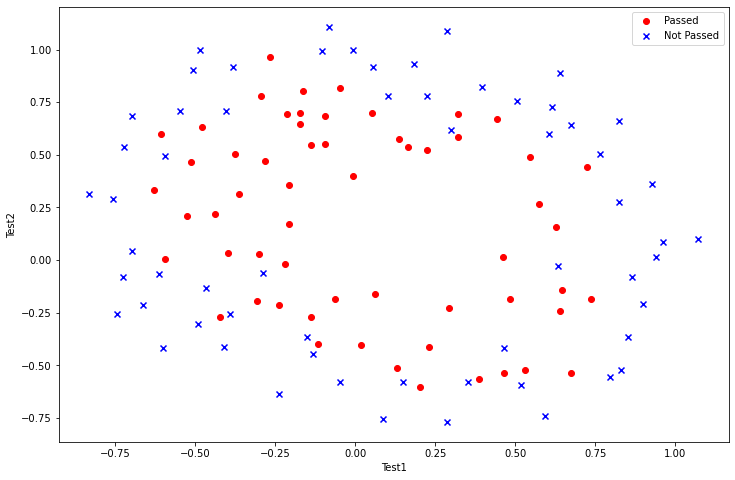

In [6]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(postive['Test1'], postive['Test2'], c = 'r', marker = 'o', label = "Passed")
ax.scatter(negative['Test1'], negative['Test2'], c = 'b', marker = 'x', label = "Not Passed")
ax.legend()
ax.set_xlabel("Test1")
ax.set_ylabel("Test2")

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def costFunction(theta, X, y, reg):
    term1 = (-1) / len(X) * (np.log(sigmoid(np.dot(X, theta))).T.dot(y) +
                             np.log((1 - sigmoid(X.dot(theta)))).T.dot(1 - y))
    reg_term = (reg / (2 * len(X))) * (np.sum(np.square(theta[1:])))
    final = term1 + reg_term
    return final[0]

In [9]:
def gradient(theta, X, y, reg):
    theta = np.reshape(theta, (theta.size, 1))
    h = sigmoid(np.dot(X, theta))
    term = (1 / len(X)) * (np.dot(X.T, (h - y)))
    term[1:] = term[1:] + reg * theta[1:] / len(X)
    return term.flatten()

In [10]:
reg = 1

In [11]:
def predict(theta, X, threshold = 0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return p.astype('int')

In [12]:
p = PolynomialFeatures(6)
poly = p.fit_transform(data.iloc[:, 1:3])
reg = 1

In [13]:
initial_theta = np.zeros(poly.shape[1])

In [14]:
for i, reg in enumerate([0, 1, 10, 15, 30, 45, 55, 65, 75, 85, 100]):
    reg = reg
    result = opt.minimize(costFunction, initial_theta, args = (poly, y, reg),
                          method = None, jac = gradient, options = {'maxiter':10000})
    accuracy = 100.0 * sum(predict(result.x, poly) == np.ravel(y)) / y.size    
    print('Accuracy for regularization = %f is %f'%(reg, accuracy))

Accuracy for regularization = 0.000000 is 91.525424
Accuracy for regularization = 1.000000 is 83.050847
Accuracy for regularization = 10.000000 is 74.576271
Accuracy for regularization = 15.000000 is 69.491525
Accuracy for regularization = 30.000000 is 67.796610
Accuracy for regularization = 45.000000 is 68.644068
Accuracy for regularization = 55.000000 is 66.101695
Accuracy for regularization = 65.000000 is 64.406780
Accuracy for regularization = 75.000000 is 64.406780
Accuracy for regularization = 85.000000 is 63.559322
Accuracy for regularization = 100.000000 is 61.016949
